# Task-2 Prediction using Decision Tree Algorithm
## Done By Joseph Prasanth

# Dataset Information


Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

# Import Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [3]:
df = pd.read_csv('Iris.csv')


In [4]:
#Checking top 5 records of Dataset..
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Basic Information regarding data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.Species.value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Visualizing Iris Data

For Visualizing the dataset we used Matplotlib or seaborn as a python library.  

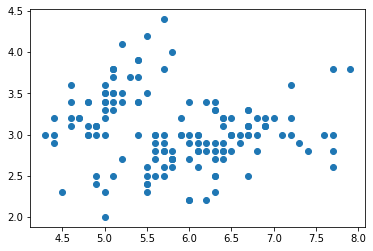

In [9]:
#Visualizing the dataset features to find pattern to solve our task

plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.show()

# Visualization Using Seaborn Library

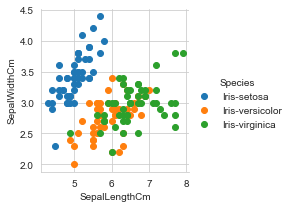

In [10]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Species') \
   .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
   .add_legend()

plt.show()

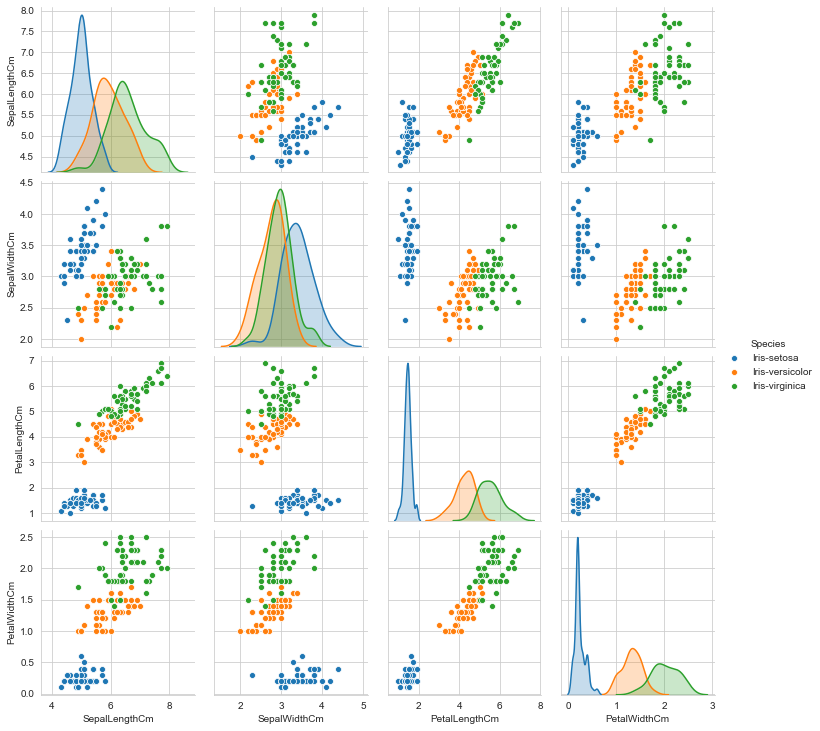

In [11]:
# Pair plot gives the relationship b/w all features distribution with each other..

sns.pairplot(df.drop(['Id'],axis=1), hue='Species')
plt.show()

# Exploring Some New Features


In [12]:
df['Sepal_diff'] = df['SepalLengthCm']-df['SepalWidthCm']
df['petal_diff'] = df['PetalLengthCm']-df['PetalWidthCm']
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,petal_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1


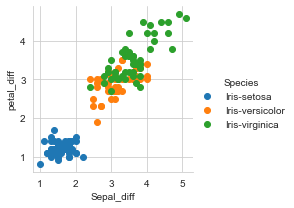

In [13]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Species')\
   .map(plt.scatter,'Sepal_diff','petal_diff')\
   .add_legend()
plt.show()    


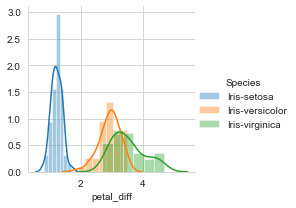

In [14]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Species')\
   .map(sns.distplot,'petal_diff')\
   .add_legend()
plt.show()    


In [15]:
df['Sep_pet_len_diff'] = df['SepalLengthCm']-df['PetalLengthCm']
df['Sep_pet_width_diff'] = df['SepalWidthCm']-df['PetalWidthCm']
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,petal_diff,Sep_pet_len_diff,Sep_pet_width_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4
...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1


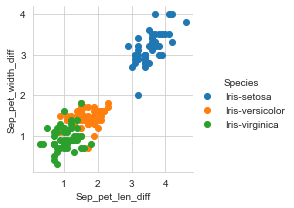

In [16]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Species')\
   .map(plt.scatter,'Sep_pet_len_diff','Sep_pet_width_diff')\
   .add_legend()
plt.show()


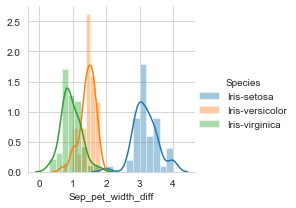

In [17]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Species')\
   .map(sns.distplot,'Sep_pet_width_diff')\
   .add_legend()
plt.show()

In [18]:
df.drop(['Id'],axis=1,inplace=True)


# Building Classification Model

[Text(133.92000000000002, 195.696, 'X[3] <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [39, 35, 38]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[3] <= 1.65\ngini = 0.499\nsamples = 73\nvalue = [0, 35, 38]'),
 Text(66.96000000000001, 108.72, 'X[2] <= 5.0\ngini = 0.149\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(100.44000000000001, 65.232, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.84000000000003, 108.72, 'X[2] <= 4.85\ngini = 0.054\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(234.36, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.8

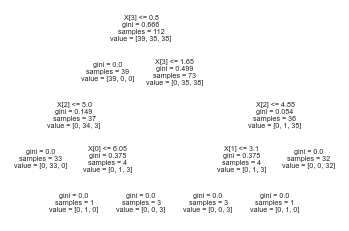

In [51]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

X = df[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y = df['Species']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25, random_state=50)

clf = DecisionTreeClassifier()
clf.fit(Xtrain, Ytrain)

tree.plot_tree(clf)

In [52]:
y_pred = clf.predict(Xtest)

In [53]:
print('Accuracy Score on train data: ', accuracy_score(y_true=Ytrain, y_pred=clf.predict(Xtrain)))
print('Accuracy Score on test data: ', accuracy_score(y_true=Ytest, y_pred=y_pred))


Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9473684210526315


In [54]:
clf_entropy = DecisionTreeClassifier(criterion = 'entropy')
clf_entropy.fit(Xtrain, Ytrain)

DecisionTreeClassifier(criterion='entropy')

In [55]:
y_pred_entropy =  clf_entropy.predict(Xtest)
print('Accuracy Score on train data: ', accuracy_score(y_true=Ytrain, y_pred =clf_entropy.predict(Xtrain)))
print('Accuracy Score on test data: ', accuracy_score(y_true=Ytest, y_pred =y_pred_entropy))


Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9473684210526315


In [56]:
# After tune the parameters of the decision tree to increase its accuracy
clf2 = DecisionTreeClassifier( min_samples_split=50)
clf2.fit(Xtrain, Ytrain)


DecisionTreeClassifier(min_samples_split=50)

In [57]:
print('Accuracy Score on train data : ', accuracy_score(y_true=Ytrain, y_pred=clf2.predict(Xtrain)))
print('Accuracy Score on the test data : ', accuracy_score(y_true=Ytest, y_pred=clf2.predict(Xtest)))


Accuracy Score on train data :  0.9642857142857143
Accuracy Score on the test data :  0.9473684210526315


# Confusion Matrix

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, y_pred)
cm

array([[11,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 11]], dtype=int64)

# Visualizing the Tree

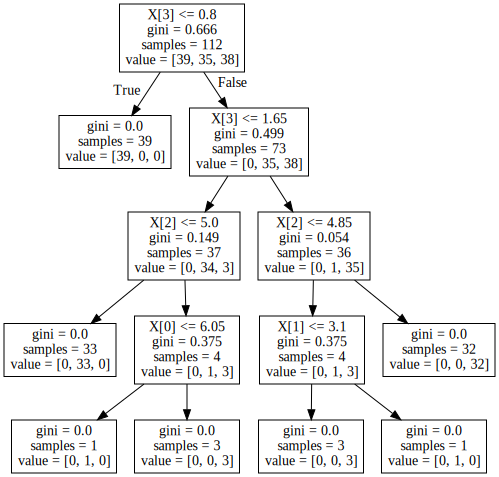

In [59]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None)

graph = graphviz.Source(dot_data)
graph


In [60]:
#Testing for New points except from Dataset
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]

clf = tree.DecisionTreeRegressor()
clf2 = clf.fit(X, y)
print(clf.predict([[1,1]]))

[0.5]
